In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

In [ ]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

In [ ]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
fetch_tweets=tweepy.Cursor(api.search, q="#unitedAIRLINES",count=100, lang ="en",since="2018-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [ ]:
data

,Date,Tweets
0,2022-09-18,RT @skiesnbeyond: EVO Aerial Blue! #aviation #...
1,2022-09-18,Thanks for giving us the game!🙉🙉🙉🙉🙉 #android #...
2,2022-09-18,Let’s not forget 2005 federal bankruptcy court...
3,2022-09-18,Do you enjoy the theme?🙉🙉🙉🙉 #android #NewGame ...
4,2022-09-18,It's fun and I want to play too.🔥🔥🔥🔥 #gamedesi...
...,...,...
564,2022-09-09,United to End Service Between San Diego and Lo...
565,2022-09-09,Get the right games.🤔 #ios #rpggames #winter #...
566,2022-09-09,ICAO: #A1C7E4\nFlt: #UAL989 #UnitedAirlines #I...
567,2022-09-09,#unitedAIRLINES #united when itc was known th...


In [ ]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
#print(cdata.dtypes)

In [ ]:
cdata

,Date,Tweets
0,2022-09-18,RT skiesnbeyond EVO Aerial Blue aviation AvGee...
1,2022-09-18,Thanks for giving us the game android Gameplay...
2,2022-09-18,Lets not forget 2005 federal bankruptcy courts...
3,2022-09-18,Do you enjoy the theme android NewGame gamedes...
4,2022-09-18,Its fun and I want to play too gamedesign NewM...
...,...,...
564,2022-09-09,United to End Service Between San Diego and Lo...
565,2022-09-09,Get the right games ios rpggames winter United...
566,2022-09-09,ICAO A1C7E4Flt UAL989 UnitedAirlines IADFRAFir...
567,2022-09-09,unitedAIRLINES united when itc was known that...


In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [ ]:
ccdata

,Date,Tweets
0,2022-09-18,RT skiesnbeyond EVO Aerial Blue aviation AvGee...
1,2022-09-17,yippee mobilegame NewGame UnitedAirlines loa ...
2,2022-09-16,Literally just trying to give AirCanada unite...
3,2022-09-15,RT unitedsucksalot united delayed my flight w...
4,2022-09-14,Emirates and United to launch new codesharein...
5,2022-09-13,RT tufftuna This is one game AndroidGameplay ...
6,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...
7,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...
8,2022-09-10,RT JaspreetTravels Long exposure from my roof...


In [ ]:
read_stock_p=pd.read_csv('UAL.csv')
# DOWNLOAD UPDATED CLOSE PRICE FROM https://finance.yahoo.com/quote/UAL/history?period1=1598918400&period2=1632268800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-20,44.759998,45.340000,43.590000,45.270000,45.270000,14700300
1,2021-09-21,45.500000,46.259998,44.279999,44.450001,44.450001,12217700
2,2021-09-22,44.849998,46.290001,44.830002,45.680000,45.680000,13783000
3,2021-09-23,46.180000,47.830002,46.099998,47.470001,47.470001,13703500
4,2021-09-24,47.380001,48.950001,47.380001,48.790001,48.790001,12236400
...,...,...,...,...,...,...,...
246,2022-09-12,39.599998,40.259998,39.110001,39.220001,39.220001,7832900
247,2022-09-13,37.740002,38.520000,37.619999,37.790001,37.790001,7532800
248,2022-09-14,37.560001,38.470001,36.709999,38.430000,38.430000,7990000
249,2022-09-15,38.200001,39.669998,38.150002,38.900002,38.900002,8411000


In [ ]:
ccdata['Prices']=""

In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-09-18,RT skiesnbeyond EVO Aerial Blue aviation AvGee...,
1,2022-09-17,yippee mobilegame NewGame UnitedAirlines loa ...,
2,2022-09-16,Literally just trying to give AirCanada unite...,37
3,2022-09-15,RT unitedsucksalot united delayed my flight w...,38
4,2022-09-14,Emirates and United to launch new codesharein...,38
5,2022-09-13,RT tufftuna This is one game AndroidGameplay ...,37
6,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,39
7,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,
8,2022-09-10,RT JaspreetTravels Long exposure from my roof...,


In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-09-18,RT skiesnbeyond EVO Aerial Blue aviation AvGee...,37
1,2022-09-17,yippee mobilegame NewGame UnitedAirlines loa ...,37
2,2022-09-16,Literally just trying to give AirCanada unite...,37
3,2022-09-15,RT unitedsucksalot united delayed my flight w...,38
4,2022-09-14,Emirates and United to launch new codesharein...,38
5,2022-09-13,RT tufftuna This is one game AndroidGameplay ...,37
6,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,39
7,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,37
8,2022-09-10,RT JaspreetTravels Long exposure from my roof...,37


In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [ ]:
ccdata["Compound"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Compound,Negative,Neutral,Positive
0,2022-09-18,RT skiesnbeyond EVO Aerial Blue aviation AvGee...,37,,,,
1,2022-09-17,yippee mobilegame NewGame UnitedAirlines loa ...,37,,,,
2,2022-09-16,Literally just trying to give AirCanada unite...,37,,,,
3,2022-09-15,RT unitedsucksalot united delayed my flight w...,38,,,,
4,2022-09-14,Emirates and United to launch new codesharein...,38,,,,
5,2022-09-13,RT tufftuna This is one game AndroidGameplay ...,37,,,,
6,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,39,,,,
7,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,37,,,,
8,2022-09-10,RT JaspreetTravels Long exposure from my roof...,37,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Compound'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
ccdata

,Date,Tweets,Prices,Compound,Negative,Neutral,Positive
0,2022-09-18,RT skiesnbeyond EVO Aerial Blue aviation AvGee...,37,0.9015,0.031,0.8,0.9015
1,2022-09-17,yippee mobilegame NewGame UnitedAirlines loa ...,37,0.9986,0.016,0.791,0.9986
2,2022-09-16,Literally just trying to give AirCanada unite...,37,0.9997,0.024,0.805,0.9997
3,2022-09-15,RT unitedsucksalot united delayed my flight w...,38,0.9998,0.039,0.785,0.9998
4,2022-09-14,Emirates and United to launch new codesharein...,38,0.9989,0.058,0.811,0.9989
5,2022-09-13,RT tufftuna This is one game AndroidGameplay ...,37,0.9945,0.072,0.807,0.9945
6,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,39,0.9958,0.084,0.782,0.9958
7,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,37,0.9794,0.034,0.91,0.9794
8,2022-09-10,RT JaspreetTravels Long exposure from my roof...,37,0.9993,0.039,0.803,0.9993


% of positive tweets=  100.0
% of negative tweets=  0.0


[]

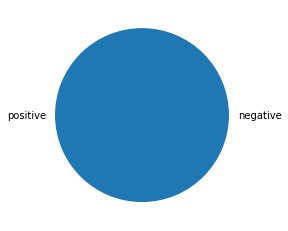

In [ ]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Compound[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
df_=ccdata[['Date','Prices','Compound','Negative','Neutral','Positive']].copy()

In [ ]:
df_

,Date,Prices,Compound,Negative,Neutral,Positive
0,2022-09-18,37,0.9015,0.031,0.8,0.9015
1,2022-09-17,37,0.9986,0.016,0.791,0.9986
2,2022-09-16,37,0.9997,0.024,0.805,0.9997
3,2022-09-15,38,0.9998,0.039,0.785,0.9998
4,2022-09-14,38,0.9989,0.058,0.811,0.9989
5,2022-09-13,37,0.9945,0.072,0.807,0.9945
6,2022-09-12,39,0.9958,0.084,0.782,0.9958
7,2022-09-11,37,0.9794,0.034,0.91,0.9794
8,2022-09-10,37,0.9993,0.039,0.803,0.9993


In [ ]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_train)

[[0.031  0.9015]
 [0.016  0.9986]
 [0.024  0.9997]
 [0.039  0.9998]
 [0.058  0.9989]
 [0.072  0.9945]]


In [ ]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [ ]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0      37
1      37
2      37
3      38
4      38
5      37


In [ ]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor()

In [ ]:
prediction = rf.predict(numpy_df_test)

In [ ]:
print(prediction)

[37.25 37.16 37.58]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [ ]:
predictions_df_

,Prices
6,37.25
7,37.16
8,37.58


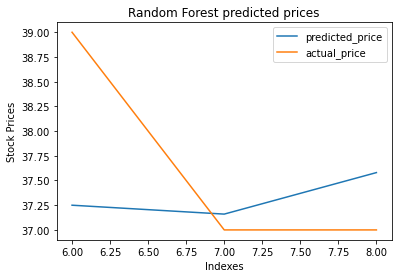

In [ ]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [ ]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [ ]:
reg.predict(numpy_df_test)

array([[37.66191074],
       [37.28507445],
       [37.3922282 ]])

In [ ]:
stocks_dataf = pd.read_pickle('Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

In [ ]:
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


In [ ]:
stocks_dataf = stocks_dataf.reset_index().rename(columns = {'index':'Date'})

In [ ]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['Date','adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

,Date,adj_close_price,Tweets
0,2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
1,2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2,2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
3,2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
4,2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
...,...,...,...
3648,2016-12-27,19945,Should the U.S. Embassy Be Moved From Tel Avi...
3649,2016-12-28,19833,"When Finding the Right Lawyer Seems Daunting,..."
3650,2016-12-29,19819,Does Empathy Guide or Hinder Moral Action?. C...
3651,2016-12-30,19762,Shielding Seized Assets From Corruption’s Clu...


In [ ]:
dataframe = stocks_dataf[['adj_close_price']].copy()

In [ ]:
dataframe["Compound"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''

In [ ]:
dataframe

,adj_close_price,Compound,Negative,Neutral,Positive
0,12469,,,,
1,12472,,,,
2,12474,,,,
3,12480,,,,
4,12398,,,,
...,...,...,...,...,...
3648,19945,,,,
3649,19833,,,,
3650,19819,,,,
3651,19762,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in dataframe.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe['Compound'].iloc[indexx] = sentence_sentiment['compound']
        dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
        dataframe['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        dataframe['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        # dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
dataframe

,adj_close_price,Compound,Negative,Neutral,Positive
0,12469,-0.9814,0.159,0.749,-0.9814
1,12472,-0.8521,0.116,0.785,-0.8521
2,12474,-0.9993,0.198,0.737,-0.9993
3,12480,-0.9982,0.131,0.806,-0.9982
4,12398,-0.9901,0.124,0.794,-0.9901
...,...,...,...,...,...
3648,19945,-0.9898,0.178,0.719,-0.9898
3649,19833,-0.9844,0.177,0.704,-0.9844
3650,19819,-0.9782,0.14,0.761,-0.9782
3651,19762,-0.995,0.168,0.734,-0.995


% of positive tweets=  44.34711196277033
% of negative tweets=  55.43388995346291


[]

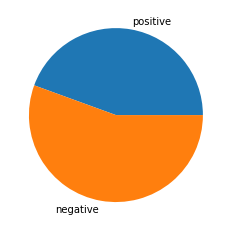

In [ ]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Compound[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
dataframe.index = stocks_dataf['Date']


In [ ]:
dataframe

,adj_close_price,Compound,Negative,Neutral,Positive
Date,,,,,
2007-01-01,12469,-0.9814,0.159,0.749,-0.9814
2007-01-02,12472,-0.8521,0.116,0.785,-0.8521
2007-01-03,12474,-0.9993,0.198,0.737,-0.9993
2007-01-04,12480,-0.9982,0.131,0.806,-0.9982
2007-01-05,12398,-0.9901,0.124,0.794,-0.9901
...,...,...,...,...,...
2016-12-27,19945,-0.9898,0.178,0.719,-0.9898
2016-12-28,19833,-0.9844,0.177,0.704,-0.9844
2016-12-29,19819,-0.9782,0.14,0.761,-0.9782


In [ ]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
train = dataframe.loc[train_data_start : train_data_end]
test = dataframe.loc[test_data_start:test_data_end]

In [ ]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Compound']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [ ]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Compound']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [ ]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.291855728056994


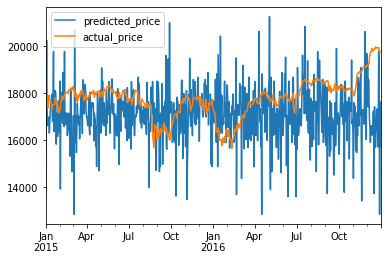

In [ ]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['adj_close_price'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['adj_close_price']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


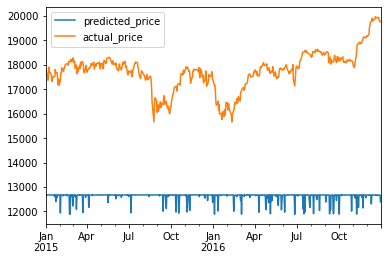

In [ ]:
# from sklearn import datasets
# from datetime import datetime, timedelta
# from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = regr.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price']
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

In [ ]:
!pip install treeinterpreter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.1


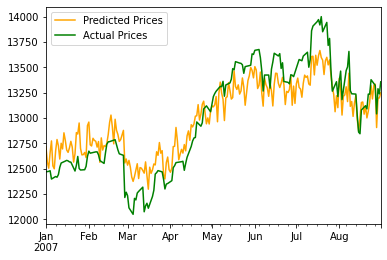

In [ ]:
from treeinterpreter import treeinterpreter as tree_interpreter
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LogisticRegression
# from datetime import datetime, timedelta
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.loc[train_data_start : train_data_end]
    test = dataframe.loc[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Compound'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Compound'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])
    
    # prediction, bias, contributions = tree_interpreter.predict(rf, numpy_dataframe_test)
    prediction = rf.predict(numpy_dataframe_test)
    prediction_list.append(prediction)
    #print("ACCURACY= ",rf.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])

    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list.columns = ['predicted_price','actual_price']
    #predictions_dataframe_list.plot()
    #predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    #predictions_dataframe_list_average.plot()
    
    # prediction = rf.predict(numpy_dataframe_test)
    # #print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
    # idx = pd.date_range(test_data_start, test_data_end)
    # predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
    # #stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
    # predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
    # predictions_dataframe1["Actual Prices"]=train['adj_close_price']
    # predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
    # predictions_dataframe1.plot(color=['orange','green'])
    # print((accuracy_score(test['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
    # """predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
    # predictions_dataframe1.plot(color='orange')
    # train['adj_close_price'].plot.line(color='green')"""
    
    prediction = rf.predict(numpy_dataframe_train)
    #print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(train_data_start, train_data_end)
    predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
    #stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
    predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
    predictions_dataframe1["Actual Prices"]=train['adj_close_price']
    predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
    predictions_dataframe1.plot(color=['orange','green'])
    print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
    """predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
    predictions_dataframe1.plot(color='orange')
    train['adj_close_price'].plot.line(color='green')"""
    break

0.1


"predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])\npredictions_dataframe1.plot(color='orange')\ntrain['adj_close_price'].plot.line(color='green')"

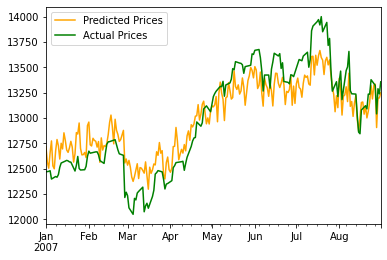

In [ ]:
prediction = rf.predict(numpy_dataframe_train)
#print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
#stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
predictions_dataframe1["Actual Prices"]=train['adj_close_price']
predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
predictions_dataframe1.plot(color=['orange','green'])
print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
"""predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')"""